# Heart Disease Prediction Model

Heart disease describes a range of conditions that affect your heart.Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease, heart rhythm problems (arrhythmias) and heart defects you’re born with (congenital heart defects), among others.Heart disease is one of the biggest causes of morbidity and mortality among the population of the world.

## Overview of Dataset

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.<br>
The dataset is a labelled dataset (has features determining the target) thus we'll use Supervised Learning models.<br>
The target column is classifying the individuals have heart disease or not, thus we'll implement Classification models.<br>
We used 4 classification model:<br>
    &emsp;&emsp;&emsp;1.DecisionTree Classifier<br>
    &emsp;&emsp;&emsp;2.RandomForest Classifier<br>
    &emsp;&emsp;&emsp;3.Support Vector Machine<br>
    &emsp;&emsp;&emsp;4.KnearestNeighbors <br>
    &emsp;&emsp;&emsp;5.Logistic Regression<br>

### Import necessary packages

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import libraries for modelling
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve,RandomizedSearchCV,KFold,LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,auc,roc_curve,roc_auc_score,classification_report,make_scorer
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

DATA EXPLORATION

In [3]:
#load dataset
data=pd.read_csv("../RN7/data/Heart Disease.csv")
original=pd.read_csv("../RN7/data/Heart Disease.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1.age-age of individuals<br>
2.sex => gender of individuals.<br>
&emsp; 1 for male and 0 for female<br>
3.cp=>Chest pain<br>
&emsp;  1.value 1= 'typical angina'<br>
&emsp;  2.value 2='atypical angina'<br>
&emsp; 3.value 3= 'non-anginal'<br>
&emsp;  4.value 4= 'asymptotic'<br>
trestbps=>Resting blood pressure<br>
chol=>serum cholestoral<br>
fbs=>fasting Blood Sugar(1=true,0=false)<br>
restecg=>resting electrocardiographic results<br>
thalach=>maximum heart rate achieved <br>
exang=>exercise included angina(1=yes,0=no)<br>
oldpeak => ST depression induced by exercise relative to rest<br>
slope=>the slope of the peak exercise ST segment<br>
ca => number of major vessels (0-3) colored by flourosopy<br>
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect<br>

In [5]:
data.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


1.sex<br>
2.cp<br>
3.fbs<br>
4.restecg<br>
5.exang<br>
6.slope<br>
7.ca<br>
8.thal<br>
9.our target variable<br>

In [8]:
#change column name
data.columns=['age','sex','chest_pain_type','resting_blood_pressure','cholestoral','fasting_blood_sugar',
              'rest_ecg','max_heart_rate achieved','exercise_induced_angina','st_deprssion','slope',
              'num_major_vessel','thalassemia','target']

In [9]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,max_heart_rate achieved,exercise_induced_angina,st_deprssion,slope,num_major_vessel,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
data.chest_pain_type.value_counts()

0    143
2     87
1     50
3     23
Name: chest_pain_type, dtype: int64

Chest_pain_type:<br>
&emsp;    (Since number start from 0)<br> 
&emsp;    0 -- typical angina<br>
&emsp;    1 --atypical angina<br>
&emsp;    2 -- non-anginal<br>
&emsp;    3 --asymptotic<br>
fasting blood sugar:<br>
&emsp;    1- blood sugar > 120<br>
&emsp;    0- blood sugar <=120<br>
rest_ecg:<br>
&emsp;    0 --normal<br>
&emsp;    1 -- ST-T wave abnormality<br>
&emsp;    2 -- left ventricular hypertrophy<br>
exercise_induced_angina:<br>
&emsp;    0 --no<br>
&emsp;    1 --yes<br>
slope:<br>
&emsp;    0 --upsloping<br>
&emsp;    1 --flat<br>
&emsp;    2 --downsloping<br>
thalassemia:<br>
&emsp;    1 --normal<br>
&emsp;    2 --fixed defect<br>
&emsp;    3 --reversable defect<br>
target:<br>
&emsp;    0 --absent<br>
&emsp;    1,2,3 --present<br>

CHANGE VALUES INTO CATEGORIES 

In [11]:
#divide sex column into categories
data['sex'][data['sex']==0]='female'
data['sex'][data['sex']==1]='male'

#divide chest_pain_type column into categories
data['chest_pain_type'][data['chest_pain_type']==0]='typical angina'
data['chest_pain_type'][data['chest_pain_type']==1]='atypical angina'
data['chest_pain_type'][data['chest_pain_type']==2]='non-anginal'
data['chest_pain_type'][data['chest_pain_type']==3]='asymptotic'

#divide fasting_blood_sugar column into categories
data['fasting_blood_sugar'][data['fasting_blood_sugar']==1]='greater than 120 mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar']==0]='lower than 120 mg/ml'

#divide rest_ecg column into categories
data['rest_ecg'][data['rest_ecg']==0]='normal'
data['rest_ecg'][data['rest_ecg']==1]='ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg']==2]='left ventricular hypertrophy'

#divide exercise_induced_angina column into categories
data['exercise_induced_angina'][data['exercise_induced_angina']==0]='no'
data['exercise_induced_angina'][data['exercise_induced_angina']==1]='yes'

#divide slope column into categories
data['slope'][data['slope']==0]='upsloping'
data['slope'][data['slope']==1]='flat'
data['slope'][data['slope']==2]='downsloping'



C:\Users\RN7\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\RN7\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\RN7\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\RN7\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWith

In [12]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,max_heart_rate achieved,exercise_induced_angina,st_deprssion,slope,num_major_vessel,thalassemia,target
0,63,male,asymptotic,145,233,greater than 120 mg/ml,normal,150,no,2.3,upsloping,0,1,1
1,37,male,non-anginal,130,250,lower than 120 mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,2,1
2,41,female,atypical angina,130,204,lower than 120 mg/ml,normal,172,no,1.4,downsloping,0,2,1
3,56,male,atypical angina,120,236,lower than 120 mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,2,1
4,57,female,typical angina,120,354,lower than 120 mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,2,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    object 
 2   chest_pain_type          303 non-null    object 
 3   resting_blood_pressure   303 non-null    int64  
 4   cholestoral              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    object 
 6   rest_ecg                 303 non-null    object 
 7   max_heart_rate achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    object 
 9   st_deprssion             303 non-null    float64
 10  slope                    303 non-null    object 
 11  num_major_vessel         303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(7), o

In [14]:
data.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholestoral                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate achieved    0
exercise_induced_angina    0
st_deprssion               0
slope                      0
num_major_vessel           0
thalassemia                0
target                     0
dtype: int64

There are no missing values

ANALYZE DATA BY VISUALISATION

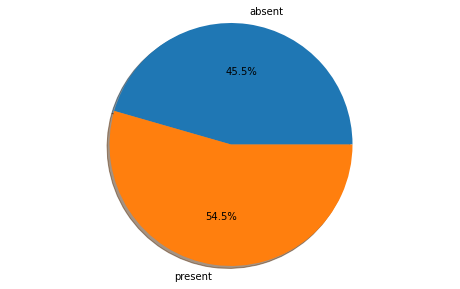

In [15]:
size=[data[data.target==0].count().target,data[data.target==1].count().target]
label=['absent','present']
fig,ax=plt.subplots(figsize=(8,5))
ax.pie(size,labels=label,autopct='%1.1f%%',shadow=True,)
ax.axis('equal')
plt.show()

In this dataset 46% of the individuals don't have heart diesease while 54% have heart diesease

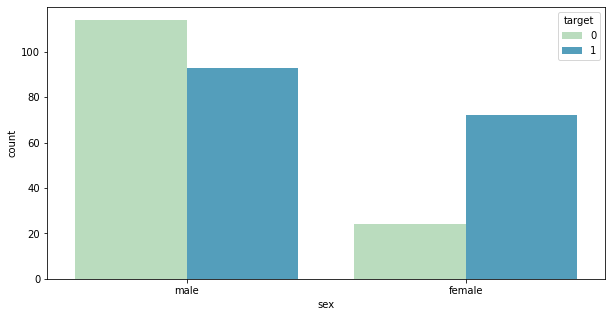

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='sex',data=data,hue='target',palette="GnBu")

male are more likely to have heart diesease

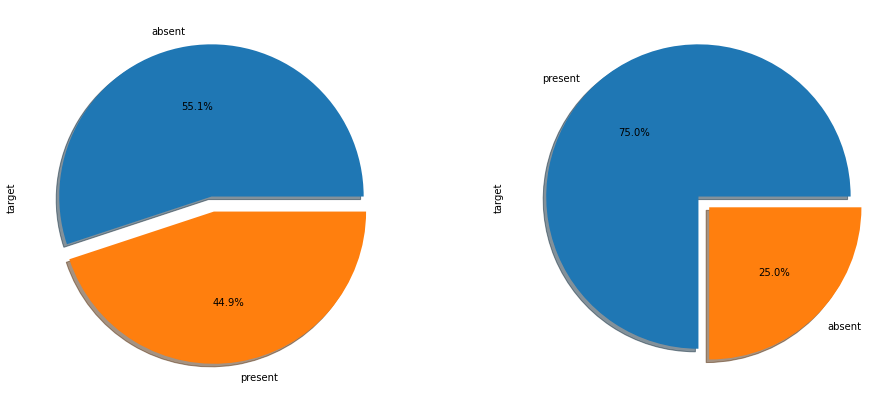

In [17]:
fig,ax=plt.subplots(1,2,figsize=(16,7))
label=['absent','present']
data[data['sex']=='male'].target.value_counts().plot.pie(explode=[0,0.10],autopct='%1.1f%%',ax=ax[0],shadow=True,labels=label)
data[data['sex']=='female'].target.value_counts().plot.pie(explode=[0,0.10],autopct='%1.1f%%',ax=ax[1],shadow=True,labels=['present','absent'])
plt.show()

45% of men and 75% of female have heart disease.<br>
percentage of female patients is more than male patient in this dataset.<br>
rate of female patient is way more than the female with no heart disease.<br>

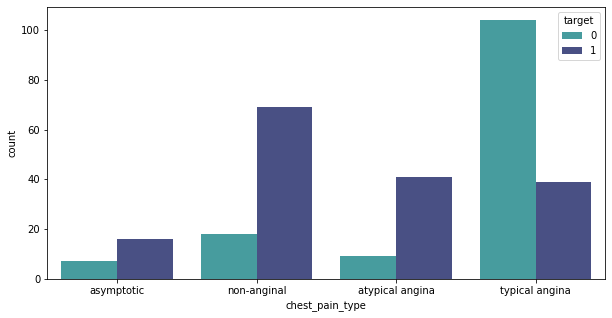

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x='chest_pain_type',data=data,hue='target',palette="mako_r")

Indiviuals with non-anginal type chest pain is more in patient with heart disease category .So it can be indication for heart disease.<br>
typical angina type chest pain is not that serious since there are more healthy individuals in this catgory as compare to patient

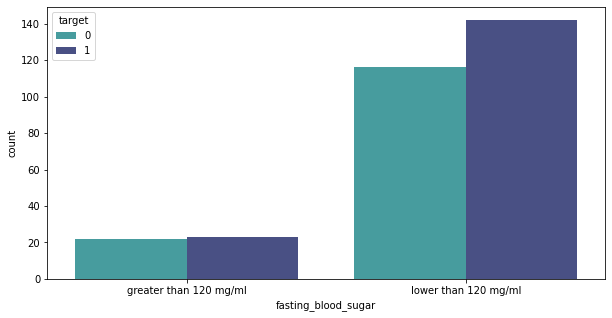

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='fasting_blood_sugar',data=data,hue='target',palette="mako_r")

amount of fasting blood sugar is almost same in both category . so it can't be a good indicator of heart disease.<br>
But Most of the heart disease patients have blood sugar less than 120.

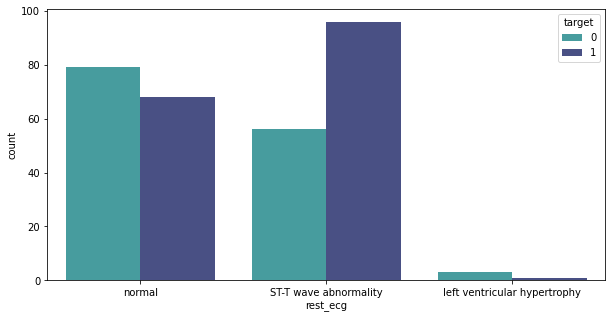

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='rest_ecg',data=data,hue='target',palette="mako_r")

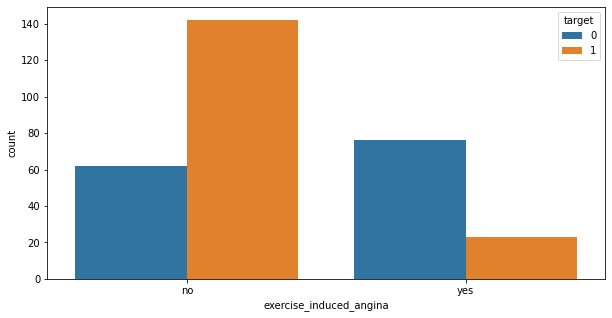

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x='exercise_induced_angina',data=data,hue='target')

exercise induced angina --amount of oxygen in the heart due to excercise that cause chest pain.<br>
People without exercise induced angina is more in the category with disease.

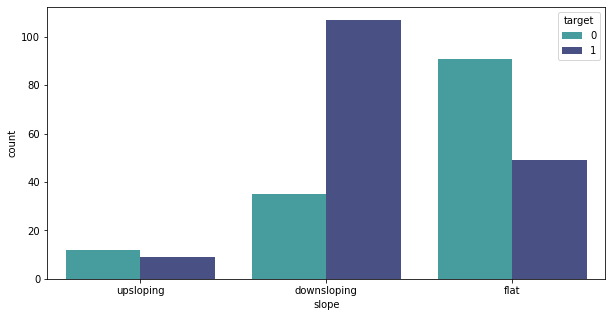

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x='slope',data=data,hue='target',palette="mako_r")

people in downsloping category have high risk for heart disease.<br>

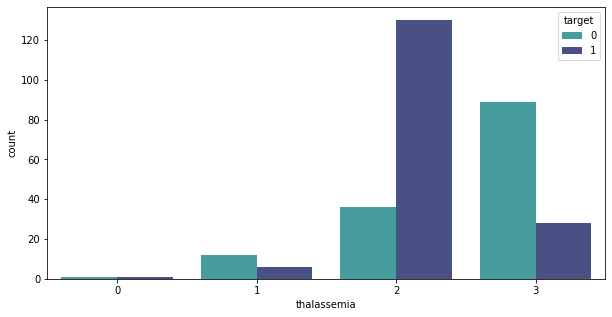

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x='thalassemia',data=data,hue='target',palette="mako_r")

Most of the people with heart disease have thal as 2.<br>

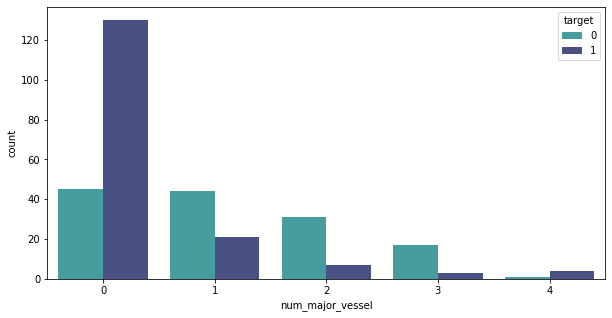

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x='num_major_vessel',data=data,hue='target',palette="mako_r")

Most of the people with heart disease have ca as 0.<br>

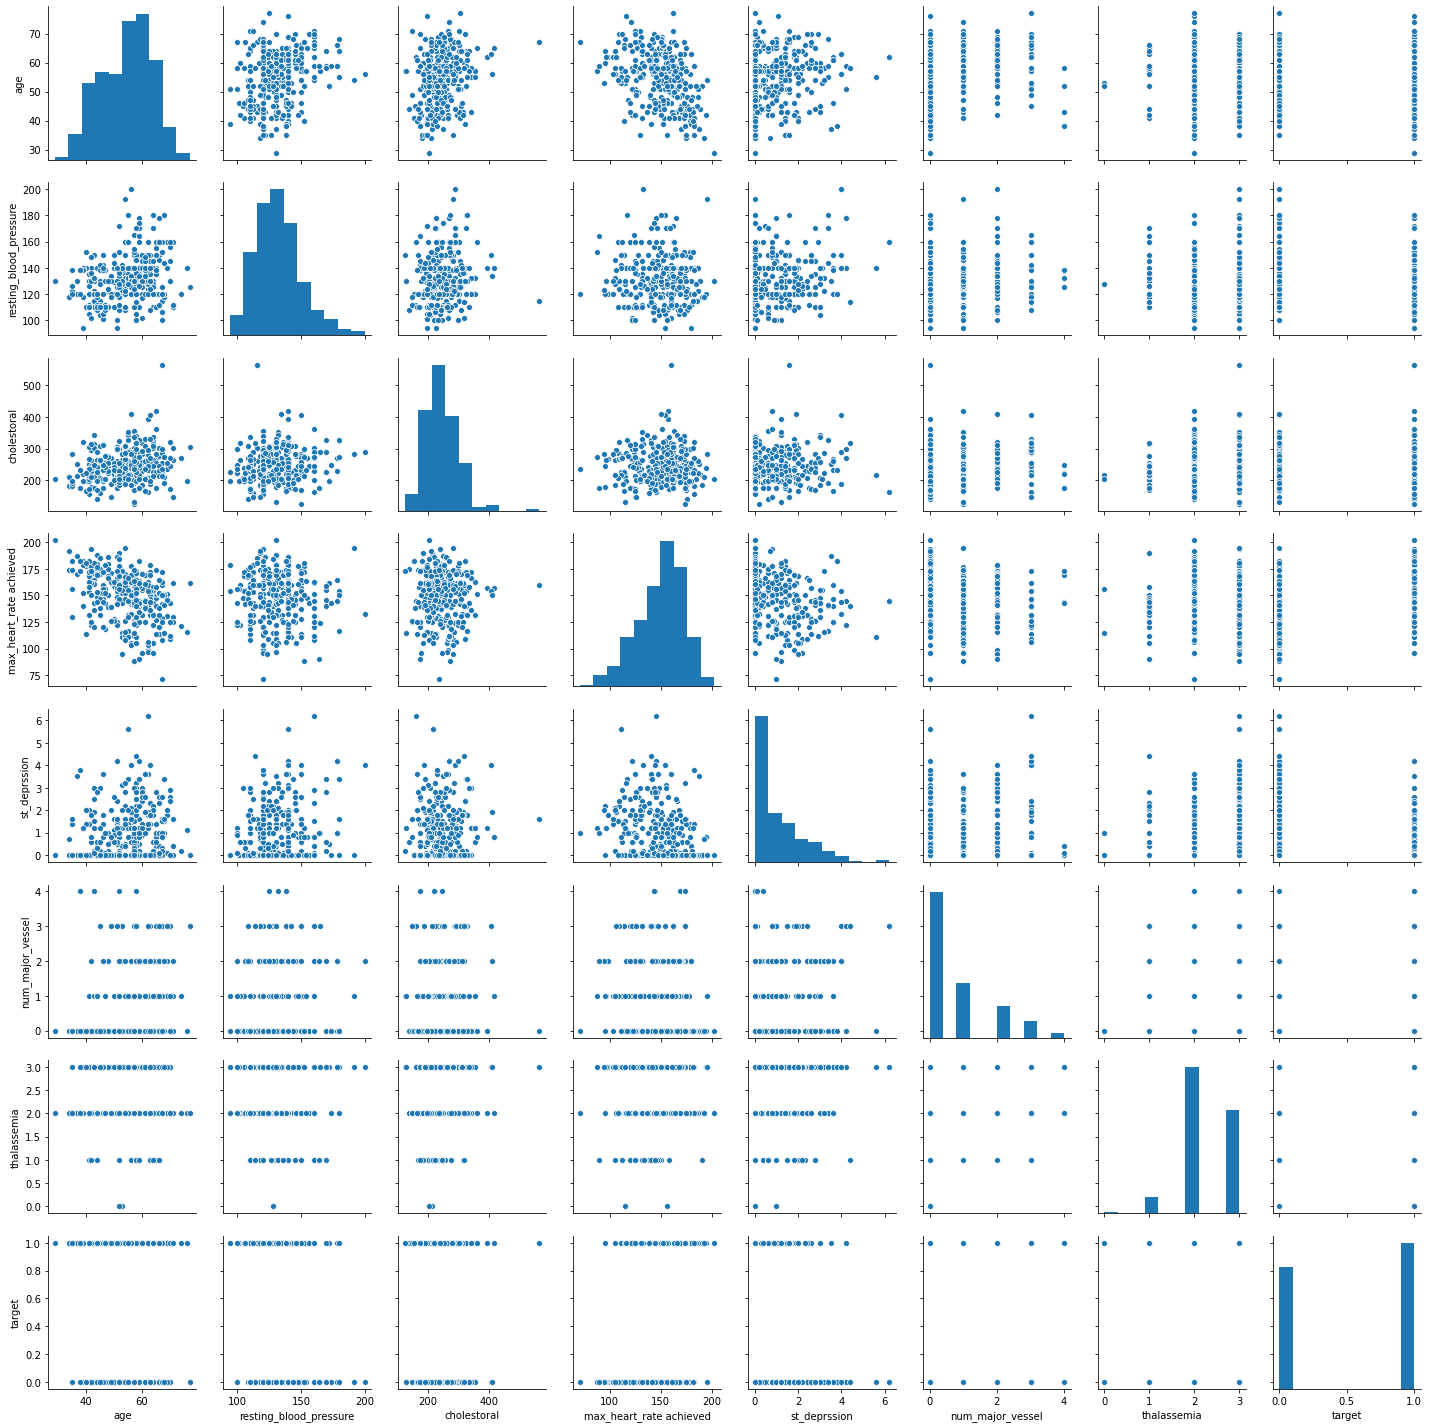

In [25]:
sns.pairplot(data)

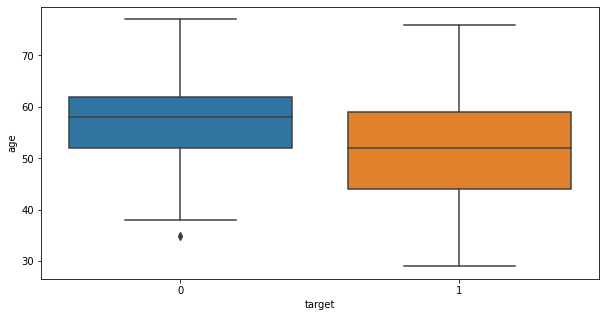

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(x='target',y='age',data=data)

median of a healthy person is more than  heart patient.<br>
most of the heart patient lies between the age of 42 and 58 while there are also healthy person whose age lies btween those peak period.Hence age can't be a good indicator

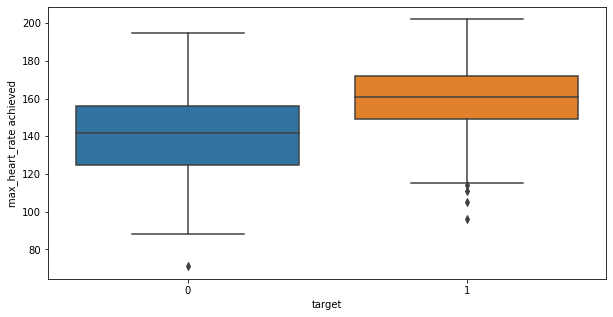

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(x='target',y='max_heart_rate achieved',data=data)

Most of the patient have heart rate  between 150 and 170.<br>
so heart rate above 150 can be considered as sign of danger.<br>
But there are some cases where patient have heart rate less tan 110.<br>

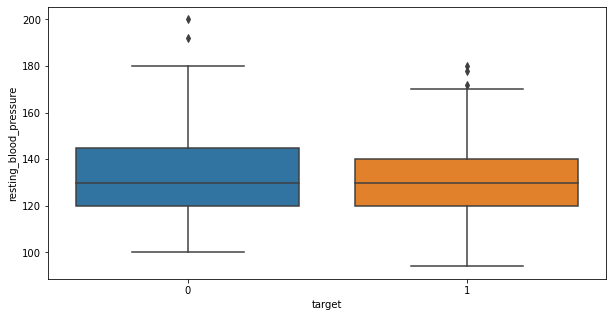

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(x='target',y='resting_blood_pressure',data=data)

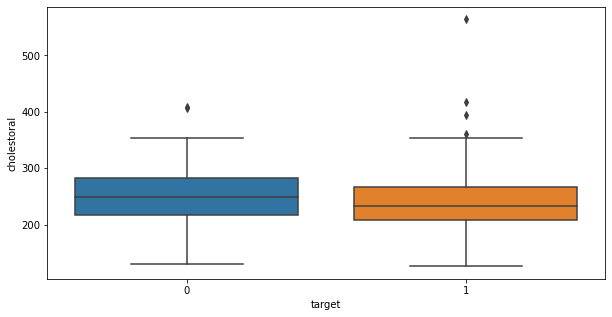

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x='target',y='cholestoral',data=data)

Most of the positive cases have cholestrol level between 200 to 270.<br>
There are some outlier in positive case category which shows that high amount cholestoral affect heart .<br>
cholestoral level betwen 250 and 500 considered to be high whil above 500 considered to be very high.<br>


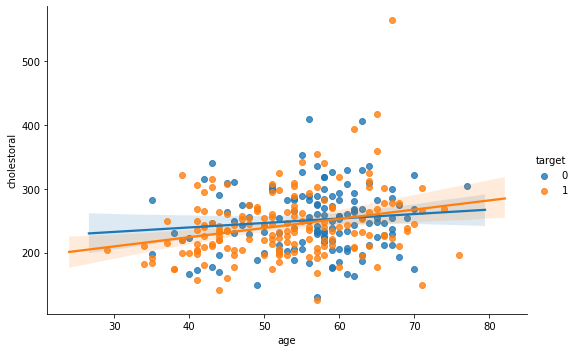

In [30]:
sns.lmplot(x='age',y='cholestoral',data=data,hue='target',aspect=1.5)

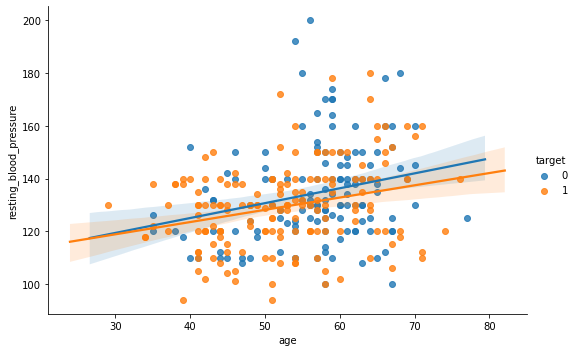

In [31]:
sns.lmplot(x='age',y='resting_blood_pressure',data=data,hue='target',aspect=1.5)

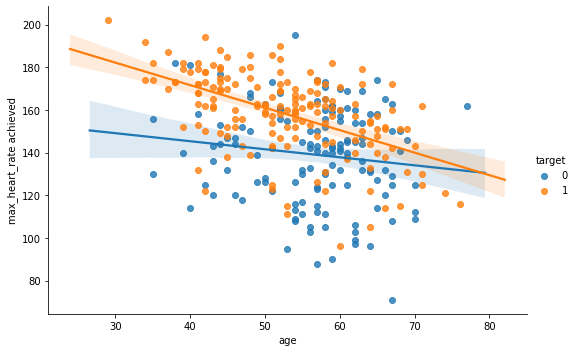

In [32]:
sns.lmplot(x='age',y='max_heart_rate achieved',data=data,hue='target',aspect=1.5)

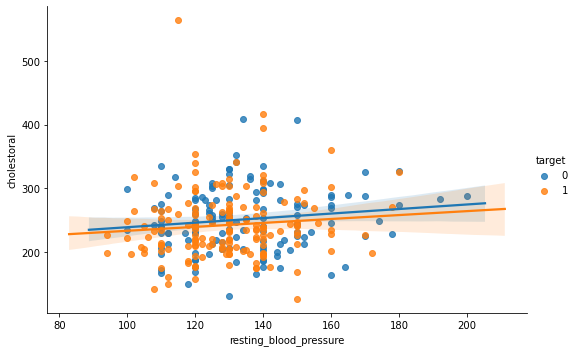

In [33]:
sns.lmplot(x='resting_blood_pressure',y='cholestoral',data=data,hue='target',aspect=1.5)

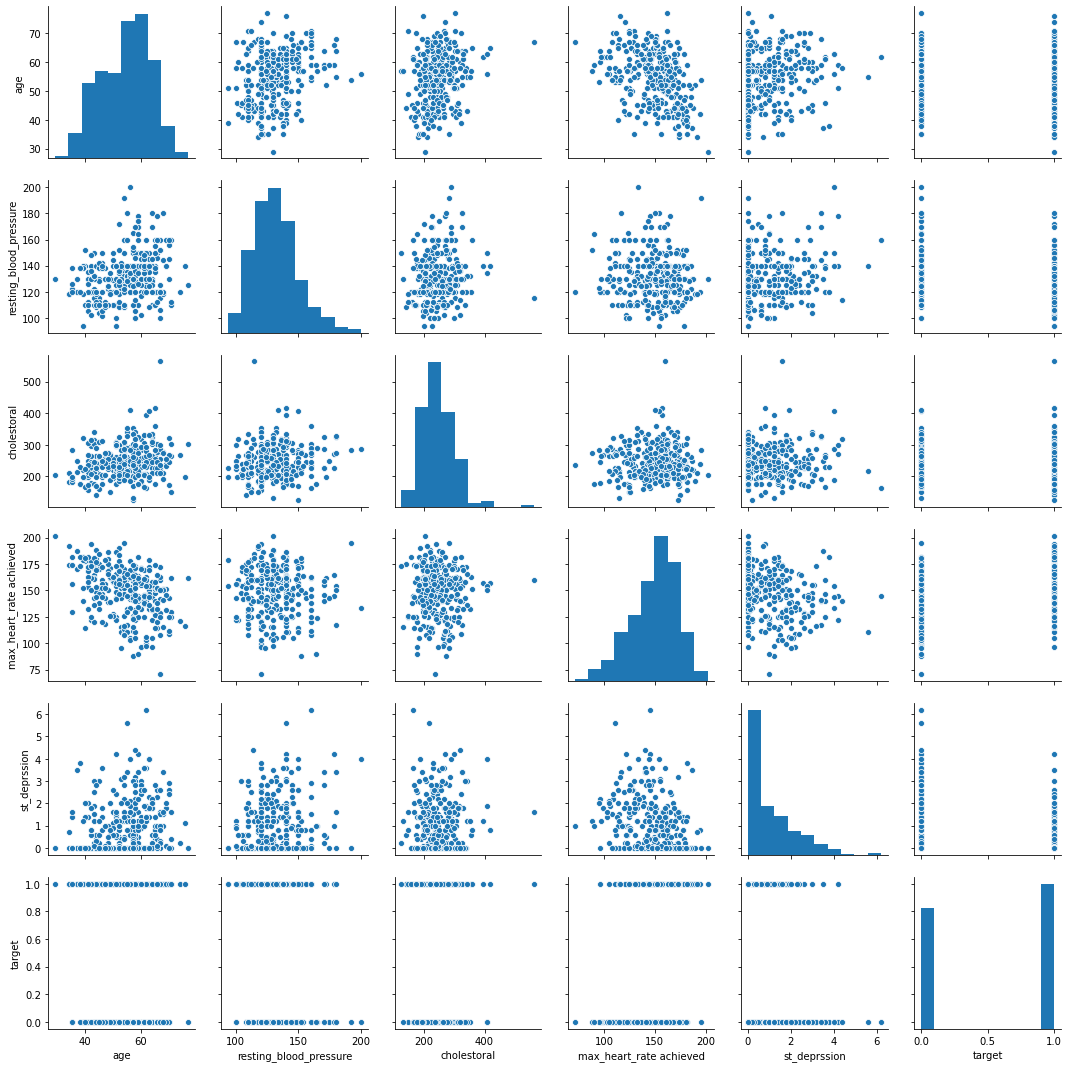

In [34]:
sns.pairplot(data[['age','resting_blood_pressure','cholestoral','max_heart_rate achieved','st_deprssion','target']])

There is no notable relationship between contionus features .<br>
But we can see that 'st_depression' has right-skewed distribution so that we can apply log transformation.<br>

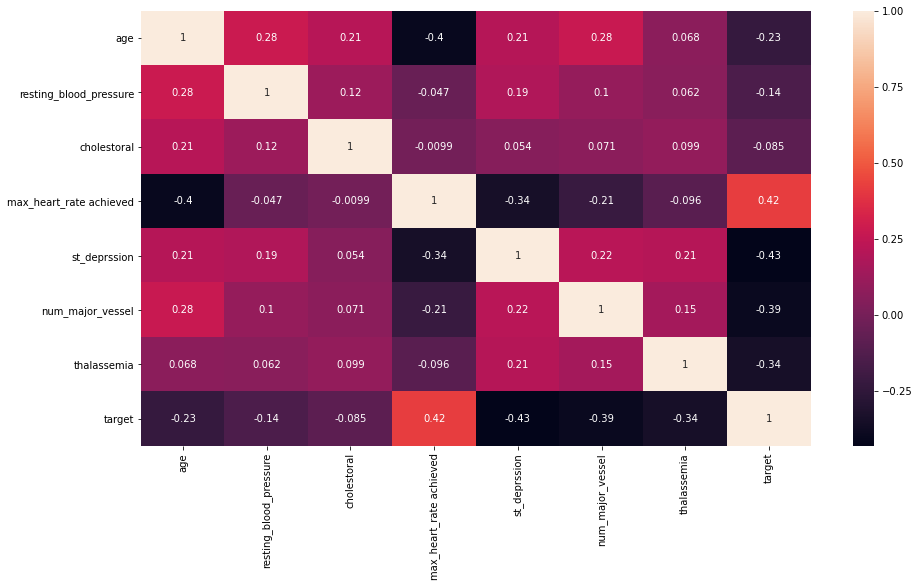

In [35]:
plt.figure(figsize=(15,8))
corr=data.corr()
sns.heatmap(corr,annot=True)

None of the features are highly corelated.So we don't need any kind of feature selection and feature extraction..<br>

DETECTING OUTLIER

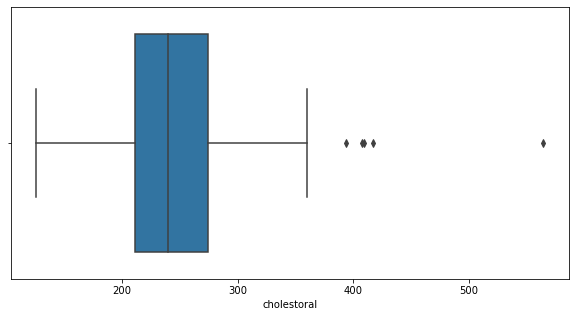

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cholestoral',data=data)

In [37]:
data.cholestoral.describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: cholestoral, dtype: float64

In [38]:
IQR=data.cholestoral.quantile(0.75)-data.cholestoral.quantile(0.25)
upper=data.cholestoral.quantile(0.75)+(IQR*1.5)
lower=data.cholestoral.quantile(0.25)-(IQR*1.5)
lower,IQR,upper

(115.75, 63.5, 369.75)

In [39]:
IQR_x=data.cholestoral.quantile(0.75)-data.cholestoral.quantile(0.25)
upper_x=data.cholestoral.quantile(0.75)+(IQR*3)
lower_x=data.cholestoral.quantile(0.25)-(IQR*3)
lower_x,IQR_x,upper_x

(20.5, 63.5, 465.0)

In [40]:
x=data[data.cholestoral>465]
y=data[data.cholestoral>369]
y

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,max_heart_rate achieved,exercise_induced_angina,st_deprssion,slope,num_major_vessel,thalassemia,target
28,65,female,non-anginal,140,417,greater than 120 mg/ml,normal,157,no,0.8,downsloping,1,2,1
85,67,female,non-anginal,115,564,lower than 120 mg/ml,normal,160,no,1.6,flat,0,3,1
96,62,female,typical angina,140,394,lower than 120 mg/ml,normal,157,no,1.2,flat,0,2,1
220,63,female,typical angina,150,407,lower than 120 mg/ml,normal,154,no,4.0,flat,3,3,0
246,56,female,typical angina,134,409,lower than 120 mg/ml,normal,150,yes,1.9,flat,2,3,0


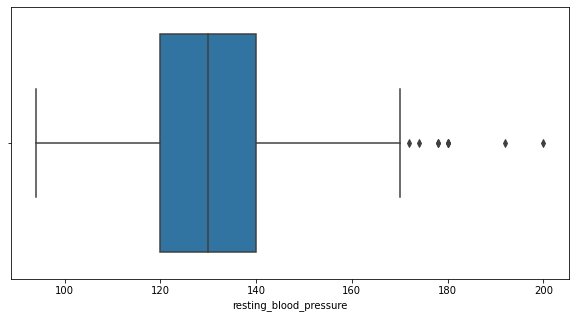

In [41]:
plt.figure(figsize=(10,5))
sns.boxplot(x='resting_blood_pressure',data=data)

In [42]:
data.resting_blood_pressure.describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: resting_blood_pressure, dtype: float64

In [43]:
IQR=data.resting_blood_pressure.quantile(0.75)-data.resting_blood_pressure.quantile(0.25)
upper=data.resting_blood_pressure.quantile(0.75)+(IQR*1.5)
lower=data.resting_blood_pressure.quantile(0.25)-(IQR*1.5)
lower,IQR,upper

(90.0, 20.0, 170.0)

In [44]:
y=data[data.resting_blood_pressure>170]
y

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,max_heart_rate achieved,exercise_induced_angina,st_deprssion,slope,num_major_vessel,thalassemia,target
8,52,male,non-anginal,172,199,greater than 120 mg/ml,ST-T wave abnormality,162,no,0.5,downsloping,0,3,1
101,59,male,asymptotic,178,270,lower than 120 mg/ml,normal,145,no,4.2,upsloping,0,3,1
110,64,female,typical angina,180,325,lower than 120 mg/ml,ST-T wave abnormality,154,yes,0.0,downsloping,0,2,1
203,68,male,non-anginal,180,274,greater than 120 mg/ml,normal,150,yes,1.6,flat,0,3,0
223,56,female,typical angina,200,288,greater than 120 mg/ml,normal,133,yes,4.0,upsloping,2,3,0
241,59,female,typical angina,174,249,lower than 120 mg/ml,ST-T wave abnormality,143,yes,0.0,flat,0,2,0
248,54,male,atypical angina,192,283,lower than 120 mg/ml,normal,195,no,0.0,downsloping,1,3,0
260,66,female,typical angina,178,228,greater than 120 mg/ml,ST-T wave abnormality,165,yes,1.0,flat,2,3,0
266,55,female,typical angina,180,327,lower than 120 mg/ml,left ventricular hypertrophy,117,yes,3.4,flat,0,2,0


In [45]:
IQR=data["max_heart_rate achieved"].quantile(0.75)-data["max_heart_rate achieved"].quantile(0.25)
upper=data["max_heart_rate achieved"].quantile(0.75)+(IQR*1.5)
lower=data["max_heart_rate achieved"].quantile(0.25)-(IQR*1.5)
lower,IQR,upper

(84.75, 32.5, 214.75)

In [46]:
y=data[data["max_heart_rate achieved"]<85]
y

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,max_heart_rate achieved,exercise_induced_angina,st_deprssion,slope,num_major_vessel,thalassemia,target
272,67,male,typical angina,120,237,lower than 120 mg/ml,ST-T wave abnormality,71,no,1.0,flat,0,2,0


DATA PREPARATION

In [47]:
from sklearn.preprocessing import PowerTransformer
log=PowerTransformer()
log.fit(data[['st_deprssion']])
data['log_depression']=log.transform(data[['st_deprssion']])
data.drop('st_deprssion',inplace=True,axis=1)

In [48]:
cnts_feature=['age','resting_blood_pressure','cholestoral','max_heart_rate achieved','log_depression']
cat_feature=[i for i in data.columns if i not in cnts_feature + ['target']]

In [49]:
data=pd.get_dummies(data,columns=cat_feature)

In [50]:
X=data.drop('target',axis=1)
y=data['target']

In [242]:
#split data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

NORMALISATION

In [243]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

MODEL

model preparation

In [244]:
#instantiate different model for tuning
tree=DecisionTreeClassifier(random_state=42)
forest=RandomForestClassifier()
lr=LogisticRegression()
svc=SVC()

In [245]:
#initialise hyperparameter for tuning
random_forest_param={'n_estimators':[int(x) for x in np.linspace(start=100,stop=2000,num=10)],
                     'criterion':['gini','entropy'],
                     'max_features':['auto','sqrt',None],
                     'max_depth':[int(x) for x in np.linspace(start=5,stop=50,num=15)]+[None],
                     'min_samples_split':[2,5,10],
                     'min_samples_leaf':[1,2,4]}
decision_tree_param={'criterion':['gini','entropy'],
                     'min_samples_leaf':[1,2,3,4]}
svm_param = {'C':[0.001, 0.01, 0.1, 1],
             'gamma':[0.00001, 0.0001, 0.001,0.005, 0.01,0.05, 0.1],
             'kernel':["linear","rbf"]}

In [246]:
#function for RandomizedSearchCV
def search(estimator,parameter):
    tune_model=RandomizedSearchCV(estimator=estimator,
                                      param_distributions=parameter,
                                      n_iter=100,cv=5,verbose=2,
                                      random_state=42,n_jobs=-1,refit=True)
    tune_model.fit(X_train,y_train)
    return tune_model

In [247]:
#function to evaluate the classification model
def metrics(test,prediction):
    return confusion_matrix(test,prediction,[0,1]),classification_report(test,prediction),roc_auc_score(test,prediction)

In [248]:
#function to draw roc_auc_curve
def curve(test,prediction):
    fpr, tpr, thresholds = roc_curve(test, prediction)
    auc_ = auc(fpr, tpr)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=' (area = {:.3f})'.format(auc_))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

### 1.DecisionTree Classifier

In [175]:
#search for best hyperparameter
decision_tree=search(tree,decision_tree_param)

C:\Users\RN7\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    7.1s finished


In [176]:
#predict on unseen test data 
y_pred=decision_tree.predict(X_test)

In [177]:
#accuracy of model using classsification metrics
matrix,report,score=metrics(y_test,y_pred)

confusion matrix is given below:


Text(0.5, 15.0, 'Predicted class')

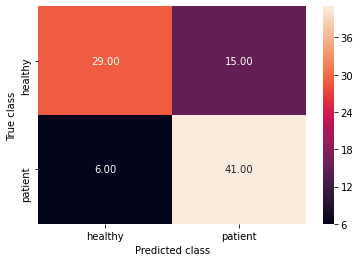

In [178]:
#confusion matrix of Random forest Classifier
print("confusion matrix is given below:")
sns.heatmap(matrix, annot=True, fmt='.2f',xticklabels = ["healthy","patient"] , yticklabels = ["healthy","patient"])
plt.ylabel('True class')
plt.xlabel('Predicted class')

In [179]:
tn, fp, fn, tp = matrix.ravel()
print(" confusion matrix shows that  we correctly classified {} and misclassified {} cases out of {} ".format(tn+tp,fp+fn,tn+tp+fp+fn))

 confusion matrix shows that  we correctly classified 70 and misclassified 21 cases out of 91 


In [180]:
print("value of false negative {}".format(fn))

value of false negative 6


In [181]:
print("We got {} accuracy on test data".format(accuracy_score(y_test,y_pred)))

We got 0.7692307692307693 accuracy on test data


In [182]:
test_acc1=accuracy_score(y_test,y_pred)
train_acc1=decision_tree.best_score_

In [183]:
print("classification report is given below:")
print(report)

classification report is given below:
              precision    recall  f1-score   support

           0       0.83      0.66      0.73        44
           1       0.73      0.87      0.80        47

    accuracy                           0.77        91
   macro avg       0.78      0.77      0.77        91
weighted avg       0.78      0.77      0.77        91



In [184]:
print("roc-auc-score of model is {}".format(roc_auc_score(y_test,y_pred)))

roc-auc-score of model is 0.765715667311412


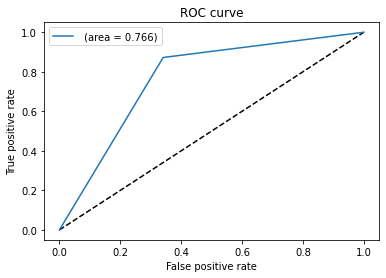

In [185]:
#ROC_AUC_CURVE IS GIVEN BELOW
curve(y_test,y_pred)

### 2.RandomForestClassifier

In [249]:
#search for best hyperparameter
random_forest=search(forest,random_forest_param)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  7.6min finished


In [250]:
#predict on unseen test data 
y_pred=random_forest.predict(X_test)

In [251]:
#accuracy of model using classsification metrics
matrix,report,score=metrics(y_test,y_pred)

confusion matrix is given below:


Text(0.5, 15.0, 'Predicted class')

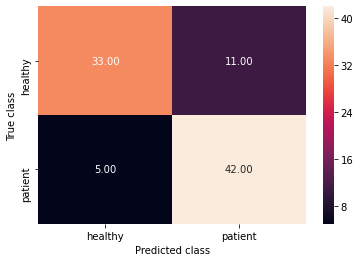

In [252]:
#confusion matrix of Random forest Classifier
print("confusion matrix is given below:")
sns.heatmap(matrix, annot=True, fmt='.2f',xticklabels = ["healthy","patient"] , yticklabels = ["healthy","patient"])
plt.ylabel('True class')
plt.xlabel('Predicted class')

In [253]:
tn, fp, fn, tp = matrix.ravel()
print(" confusion matrix shows that  we correctly classified {} and misclassified {} cases out of {} ".format(tn+tp,fp+fn,tn+tp+fp+fn))

 confusion matrix shows that  we correctly classified 75 and misclassified 16 cases out of 91 


In [254]:
print("value of false negative {}".format(fn))

value of false negative 5


one of the most important metrics in medical cases for classification problm is false negative which represtent that observation is positive but prediction is negative .In our dataset value of False negative is quite low which is a good indicator of accuracy of our model

In [255]:
print("We got {} accuracy on test data".format(accuracy_score(y_test,y_pred)))

We got 0.8241758241758241 accuracy on test data


In [256]:
test_acc2=accuracy_score(y_test,y_pred)
train_acc2=random_forest.best_score_

In [257]:
print("classification report is given below:")
print(report)

classification report is given below:
              precision    recall  f1-score   support

           0       0.87      0.75      0.80        44
           1       0.79      0.89      0.84        47

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



for class 0:<br>
&emsp;    1.precision is 87% which means that 87% of label 0 is corectly classified among total number of predicted negative                 example<br>
&emsp;    2.recall is 77% which means that 77% of label 0 is corectly classified among total number of negative example<br>
for class 1:<br>
&emsp;     1.precision is 81% which means that 81% of label 1 is corectly classified among total number of predicted positive           example<br>
&emsp;    2.recall is 89% which means that 89% of label 1 is corectly classified among total number of positive example<br>

In [197]:
print("roc-auc-score of model is {}".format(roc_auc_score(y_test,y_pred)))

roc-auc-score of model is 0.8331721470019342


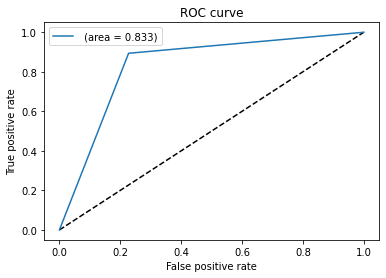

In [198]:
#ROC_AUC_CURVE IS GIVEN BELOW
curve(y_test,y_pred)

#### SVM Classifier

In [192]:

svm=RandomizedSearchCV(svc,svm_param,cv=5,n_jobs=-1,refit=True,random_state=42)
svm.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1],
                                        'gamma': [1e-05, 0.0001, 0.001, 0.005,
                                                  0.01, 0.05, 0.1],
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [193]:
svm.best_params_

{'kernel': 'linear', 'gamma': 0.1, 'C': 0.01}

In [194]:
#predict on unseen test data 
y_pred=svm.predict(X_test)

In [195]:
#accuracy of model using classsification metrics
matrix,report,score=metrics(y_test,y_pred)

confusion matrix is given below:


Text(0.5, 15.0, 'Predicted class')

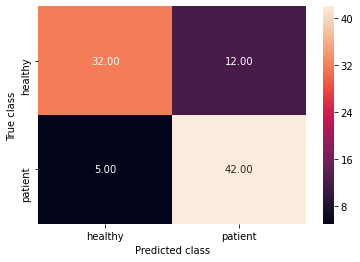

In [196]:
#confusion matrix of Random forest Classifier
print("confusion matrix is given below:")
sns.heatmap(matrix, annot=True, fmt='.2f',xticklabels = ["healthy","patient"] , yticklabels = ["healthy","patient"])
plt.ylabel('True class')
plt.xlabel('Predicted class')

In [197]:
tn, fp, fn, tp = matrix.ravel()
print(" confusion matrix shows that  we correctly classified {} and misclassified {} cases out of {} ".format(tn+tp,fp+fn,tn+tp+fp+fn))

 confusion matrix shows that  we correctly classified 74 and misclassified 17 cases out of 91 


In [198]:
print("value of false negative {}".format(fn))

value of false negative 5


In [199]:
print("We got {} accuracy on test data".format(accuracy_score(y_test,y_pred)))

We got 0.8131868131868132 accuracy on test data


In [200]:
test_acc3=accuracy_score(y_test,y_pred)
train_acc3=svm.best_score_

In [201]:
print("classification report is given below:")
print(report)

classification report is given below:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.78      0.89      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



In [202]:
print("roc-auc-score of model is {}".format(roc_auc_score(y_test,y_pred)))

roc-auc-score of model is 0.8104448742746615


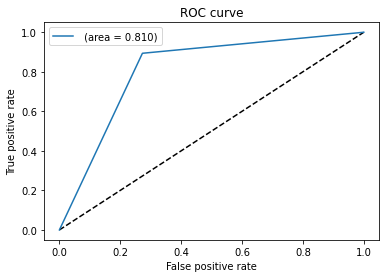

In [203]:
#ROC_AUC_CURVE IS GIVEN BELOW
curve(y_test,y_pred)

3.KNearestNeighbors Classifier

In [204]:
#try KnearestNeighbor Classifier for different value of n_neighbors
n=[x for x in list(range(1,50))]
train_scores=[]
test_scores=[]
for k in n:
    k_value = k
    knn=KNeighborsClassifier(n_neighbors = k_value)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    test_scores.append(accuracy_score(y_test,y_pred))
    train_scores.append(accuracy_score(y_train,knn.predict(X_train)))    

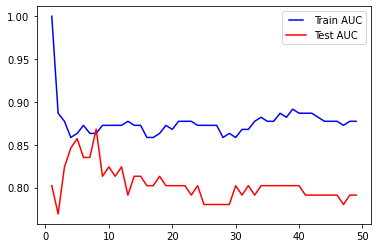

In [205]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n, train_scores, 'b', label='Train AUC')
line2, = plt.plot(n, test_scores, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.show()

from above figure we found that for n_neighbors=8 the model predict perfectly.<br>
But with increase in value of n_neighbors model started overfitting.<br>

In [206]:
Knearest=KNeighborsClassifier(n_neighbors=8)
Knearest.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [207]:
#predict on unseen test data 
y_pred=Knearest.predict(X_test)

In [208]:
#accuracy of model using classsification metrics
matrix,report,score=metrics(y_test,y_pred)

confusion matrix is given below:


Text(0.5, 15.0, 'Predicted class')

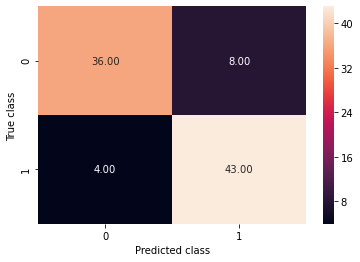

In [209]:
#confusion matrix of Random forest Classifier
print("confusion matrix is given below:")
sns.heatmap(matrix, annot=True, fmt='.2f',xticklabels = ["0","1"] , yticklabels = ["0","1"])
plt.ylabel('True class')
plt.xlabel('Predicted class')

In [210]:
tn, fp, fn, tp = matrix.ravel()
print(" confusion matrix shows that  we correctly classified {} and misclassified {} cases out of {} ".format(tn+tp,fp+fn,tn+tp+fp+fn))

 confusion matrix shows that  we correctly classified 79 and misclassified 12 cases out of 91 


In [211]:
print("value of false negative {}".format(fn))

value of false negative 4


one of the most important metrics in medical cases for classification problm is false negative which represtent that observation is positive but prediction is negative .In our dataset value of False negative is quite low which is a good indicator of accuracy of our model

In [212]:
print("We got {} accuracy on test data".format(accuracy_score(y_test,y_pred)))

We got 0.8681318681318682 accuracy on test data


In [213]:
test_acc4=accuracy_score(y_test,y_pred)
train_acc4=accuracy_score(y_train,Knearest.predict(X_train))

In [214]:
accuracy_score(y_train,Knearest.predict(X_train))

0.8632075471698113

In [215]:
print("classification report is given below:")
print(report)

classification report is given below:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        44
           1       0.84      0.91      0.88        47

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



for class 0:<br>
&emsp;    1.precision is 90% which means that 90% of label 0 is corectly classified among total number of predicted negative           example<br>
&emsp;    2.recall is 82% which means that 82% of label 0 is corectly classified among total number of negative example<br>
for class 1:<br>
&emsp;     1.precision is 84% which means that 81% of label 1 is corectly classified among total number of predicted positive           example<br>
&emsp;    2.recall is 91% which means that 89% of label 1 is corectly classified among total number of positive example<br>

In [216]:
print("roc-auc-score of model is {}".format(roc_auc_score(y_test,y_pred)))

roc-auc-score of model is 0.8665377176015473


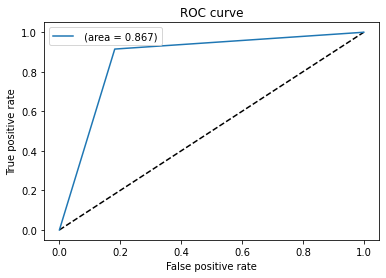

In [217]:
#ROC_AUC_CURVE IS GIVEN BELOW
curve(y_test,y_pred)

4.LogisticRegression

In [218]:
train_scores=[]
test_scores=[]
for i in [0.0001, 0.001, 0.01, 0.1, 1]:
    x=LogisticRegression(C=i)
    x.fit(X_train,y_train)
    y_pred=x.predict(X_test)
    test_scores.append(accuracy_score(y_test,y_pred))
    train_scores.append(accuracy_score(y_train,x.predict(X_train)))        

In [219]:
df=pd.DataFrame({'n':[0.0001, 0.001, 0.01, 0.1, 1],'train_score':train_scores,'test_score':test_scores})
df.columns=['n','train_score','test_score']
df

,n,train_score,test_score
0,0.0001,0.556604,0.516484
1,0.0010,0.830189,0.769231
2,0.0100,0.872642,0.824176
3,0.1000,0.877358,0.835165
4,1.0000,0.896226,0.868132


(0.5, 1.0)

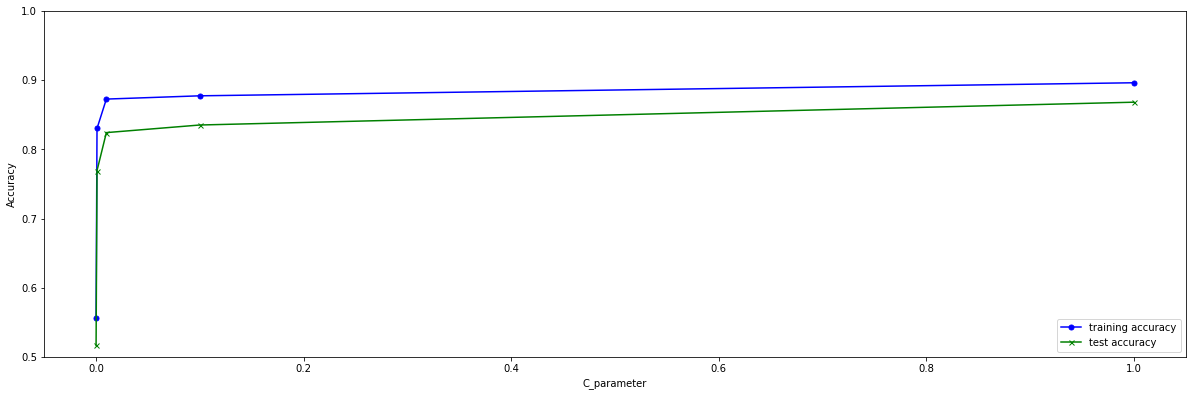

In [220]:
plt.figure(figsize=(45,14))
plt.subplot(2,2,1)
plt.plot([0.0001, 0.001, 0.01, 0.1, 1]
            ,train_scores
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
    
plt.plot([0.0001, 0.001, 0.01, 0.1, 1]
            ,test_scores
            ,color='green'
            ,marker='x'
            ,markersize=5
            ,label='test accuracy')    
plt.xlabel('C_parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5,1])

In [221]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [222]:
#predict on unseen test data 
y_pred=log_reg.predict(X_test)

In [223]:
#accuracy of model using classsification metrics
matrix,report,score=metrics(y_test,y_pred)

confusion matrix is given below:


Text(0.5, 15.0, 'Predicted class')

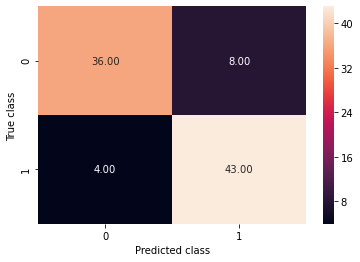

In [224]:
#confusion matrix of Random forest Classifier
print("confusion matrix is given below:")
sns.heatmap(matrix, annot=True, fmt='.2f',xticklabels = ["0","1"] , yticklabels = ["0","1"])
plt.ylabel('True class')
plt.xlabel('Predicted class')

In [225]:
tn, fp, fn, tp = matrix.ravel()
print(" confusion matrix shows that  we correctly classified {} and misclassified {} cases out of {} ".format(tn+tp,fp+fn,tn+tp+fp+fn))

 confusion matrix shows that  we correctly classified 79 and misclassified 12 cases out of 91 


In [226]:
print("value of false negative {}".format(fn))

value of false negative 4


one of the most important metrics in medical cases for classification problm is false negative which represtent that observation is positive but prediction is negative .In our dataset value of False negative is quite low which is a good indicator of accuracy of our model

In [227]:
print("We got {} accuracy on test data".format(accuracy_score(y_test,y_pred)))

We got 0.8681318681318682 accuracy on test data


In [228]:
test_acc5=accuracy_score(y_test,y_pred)
train_acc5=accuracy_score(y_train,log_reg.predict(X_train))

In [229]:
accuracy_score(y_train,log_reg.predict(X_train))

0.8962264150943396

In [230]:
print("classification report is given below:")
print(report)

classification report is given below:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        44
           1       0.84      0.91      0.88        47

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [231]:
print("roc-auc-score of model is {}".format(roc_auc_score(y_test,y_pred)))

roc-auc-score of model is 0.8665377176015473


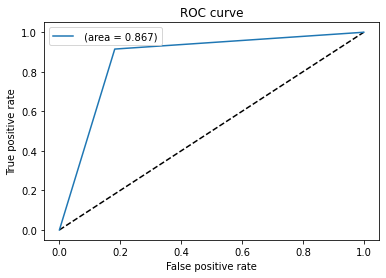

In [232]:
#ROC_AUC_CURVE IS GIVEN BELOW
curve(y_test,y_pred)

In [258]:
acc=pd.DataFrame({'model':['Decision Tree','Random Forest','SVM','KNN','Logistic REgression'],
                  'training_accuracy':[train_acc1,train_acc2,train_acc3,train_acc4,train_acc5],
                  'testing_accuracy':[test_acc1,test_acc2,test_acc3,test_acc4,test_acc5]})

In [259]:
acc.set_index("model")

,training_accuracy,testing_accuracy
model,,
Decision Tree,0.755260,0.769231
Random Forest,0.844408,0.824176
SVM,0.849059,0.813187
KNN,0.863208,0.868132
Logistic REgression,0.896226,0.868132


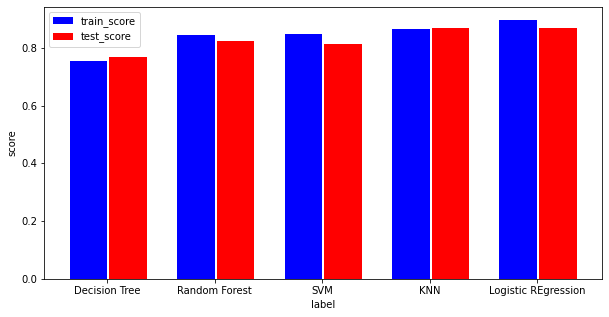

In [265]:
fig,ax=plt.subplots(figsize=(10,5))
index=np.arange(5)
bar_width=0.35
training_score=ax.bar(index,acc['training_accuracy'],color='b',width=bar_width,label="train_score")
forest_score=ax.bar(index+0.37,acc['testing_accuracy'],color='r',width=bar_width,label="test_score")
ax.set_xlabel('label')
ax.set_ylabel('score')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(acc['model'])
ax.legend()

(0.5, 1.0)

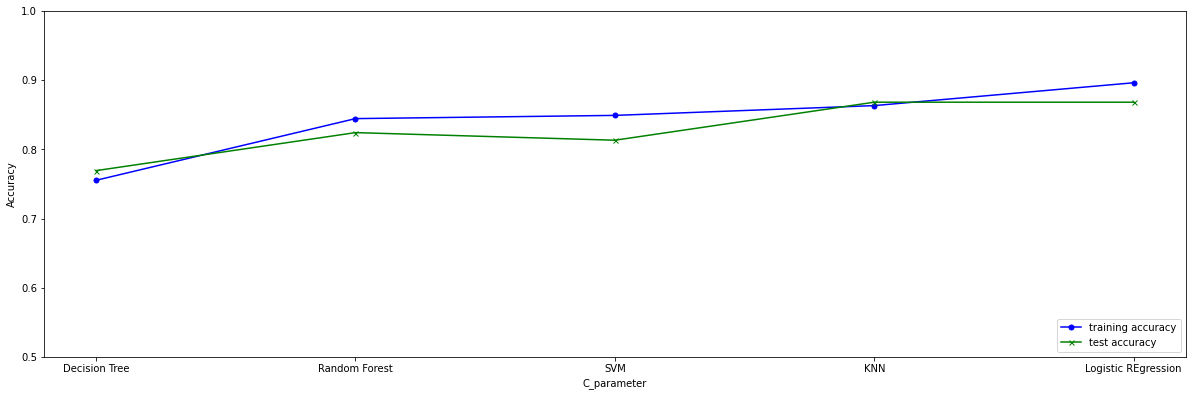

In [261]:
plt.figure(figsize=(45,14))
plt.subplot(2,2,1)
plt.plot(acc['model']
            ,acc['training_accuracy']
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
    
plt.plot(acc['model']
            ,acc['testing_accuracy']
            ,color='green'
            ,marker='x'
            ,markersize=5
            ,label='test accuracy')    
plt.xlabel('C_parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5,1])

Here we can see that KNN model working really well in this dataset having accuracy of 87%.But we can improve the model accuracy by ensembling more than one model 

#### Ensembling

In [100]:
#import necessary library
from sklearn.ensemble import VotingClassifier
#ensemble KNN and LogisticRegression model
model_voting=VotingClassifier(estimators=[('knn',Knearest),('lr',log_reg)])
model_voting.fit(X_train,y_train)
y_pred=model_voting.predict(X_test)

In [101]:
#accuracy of model using classsification metrics
matrix,report,score=metrics(y_test,y_pred)

confusion matrix is given below:


Text(0.5, 15.0, 'Predicted class')

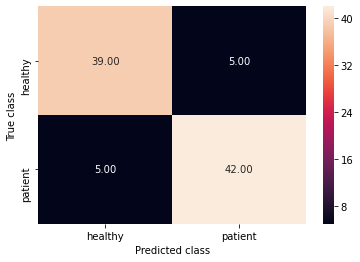

In [102]:
#confusion matrix of Random forest Classifier
print("confusion matrix is given below:")
sns.heatmap(matrix, annot=True, fmt='.2f',xticklabels = ["healthy","patient"] , yticklabels = ["healthy","patient"])
plt.ylabel('True class')
plt.xlabel('Predicted class')

In [103]:
tn, fp, fn, tp = matrix.ravel()
print(" confusion matrix shows that  we correctly classified {} and misclassified {} cases out of {} ".format(tn+tp,fp+fn,tn+tp+fp+fn))

 confusion matrix shows that  we correctly classified 81 and misclassified 10 cases out of 91 


In [104]:
print("value of false negative {}".format(fn))

value of false negative 5


In [105]:
print("We got {} accuracy on test data".format(accuracy_score(y_test,y_pred)))

We got 0.8901098901098901 accuracy on test data


In [106]:
print("classification report is given below:")
print(report)

classification report is given below:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        44
           1       0.89      0.89      0.89        47

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91



In [107]:
print("roc-auc-score of model is {}".format(roc_auc_score(y_test,y_pred)))

roc-auc-score of model is 0.889990328820116


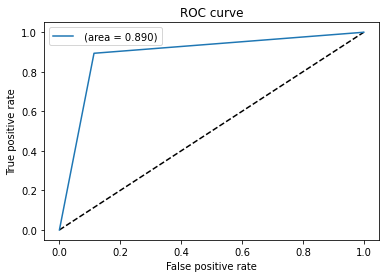

In [108]:
#ROC_AUC_CURVE IS GIVEN BELOW
curve(y_test,y_pred)

    Individual accuracy of KNN and Logistic Reegression was 87% . While, by applying ensemble method we can achieve upto 89 % which is small but effective improvement in accuray

#### Bagging

In [1116]:
from sklearn.ensemble import BaggingClassifier
#applying bagging method in SVM model
model_bagging=BaggingClassifier(base_estimator=svm,n_estimators=10,oob_score=True,random_state=76)
model_bagging.fit(X_train,y_train)

C:\Users\RN7\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:633: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\RN7\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:638: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=RandomizedSearchCV(cv=5, error_score=nan,
                                                    estimator=SVC(C=1.0,
                                                                  break_ties=False,
                                                                  cache_size=200,
                                                                  class_weight=None,
                                                                  coef0=0.0,
                                                                  decision_function_shape='ovr',
                                                                  degree=3,
                                                                  gamma='scale',
                                                                  kernel='rbf',
                                                                  max_iter=-1,
                                                                  probability=False,
                          

In [1117]:
model_bagging.oob_score_

0.8207547169811321

In [1118]:
y_pred=model_bagging.predict(X_test)
accuracy_score(y_test,y_pred)

0.8791208791208791

In [1119]:
#accuracy of model using classsification metrics
matrix,report,score=metrics(y_test,y_pred)

confusion matrix is given below:


Text(0.5, 15.0, 'Predicted class')

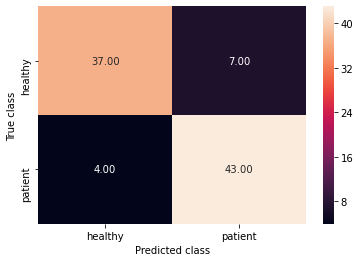

In [1120]:
#confusion matrix of Random forest Classifier
print("confusion matrix is given below:")
sns.heatmap(matrix, annot=True, fmt='.2f',xticklabels = ["healthy","patient"] , yticklabels = ["healthy","patient"])
plt.ylabel('True class')
plt.xlabel('Predicted class')

In [1121]:
print("roc-auc-score of model is {}".format(roc_auc_score(y_test,y_pred)))

roc-auc-score of model is 0.8779013539651837


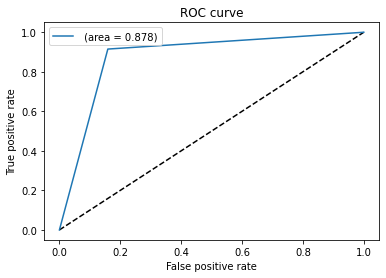

In [1122]:
#ROC_AUC_CURVE IS GIVEN BELOW
curve(y_test,y_pred)

Accuracy of SVM model was 82% while by using bagging method(create same model on different bootstrap sample of a dataset then find the best prediction among them) we reached upto 87% accuracy

#### Boosting

In [146]:
import xgboost as xgb
xg=xgb.XGBClassifier()

In [152]:
gbm_param_grid = {   
    'n_estimators': list(range(1,100)),
    'max_depth': range(1, 10),
    'learning_rate': [.1,.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1],
    'booster':["gbtree"],
     'min_child_weight': [0.001,0.003,0.01],
}

In [148]:
model_boosting=RandomizedSearchCV(estimator=xg,param_distributions=gbm_param_grid,scoring='accuracy',verbose=0,cv=4,n_iter=100,refit=True)
model_boosting.fit(X_train,y_train)
y_pred=model_boosting.predict(X_test)
best_param=model_boosting.best_params_

In [157]:
xgb_classifier=xgb.XGBClassifier(max_depth=best_param['max_depth'],
                                 learning_rate=best_param['learning_rate'],
                                 min_child_weight=best_param['min_child_weight'],
                                 n_estimators=21,booster='gbtree',
                                 colsample_bytree=0.9)
xgb_classifier.fit(X_train,y_train)
y_pred=xgb_classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.8571428571428571

In [158]:
#accuracy of model using classsification metrics
matrix,report,score=metrics(y_test,y_pred)

confusion matrix is given below:


Text(0.5, 15.0, 'Predicted class')

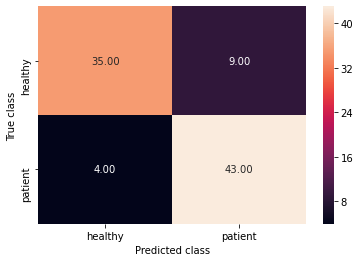

In [159]:
#confusion matrix of Random forest Classifier
print("confusion matrix is given below:")
sns.heatmap(matrix, annot=True, fmt='.2f',xticklabels = ["healthy","patient"] , yticklabels = ["healthy","patient"])
plt.ylabel('True class')
plt.xlabel('Predicted class')

In [162]:
tn, fp, fn, tp = matrix.ravel()
print(" confusion matrix shows that  we correctly classified {} and misclassified {} cases out of {} ".format(tn+tp,fp+fn,tn+tp+fp+fn))

 confusion matrix shows that  we correctly classified 78 and misclassified 13 cases out of 91 


In [163]:
print("value of false negative {}".format(fn))

value of false negative 4


In [164]:
print("classification report is given below:")
print(report)

classification report is given below:
              precision    recall  f1-score   support

           0       0.90      0.80      0.84        44
           1       0.83      0.91      0.87        47

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



In [165]:
print("roc-auc-score of model is {}".format(roc_auc_score(y_test,y_pred)))

roc-auc-score of model is 0.8551740812379109


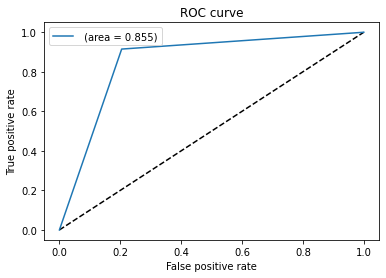

In [166]:
#ROC_AUC_CURVE IS GIVEN BELOW
curve(y_test,y_pred)

CONCLUSION

Heart Disease is one of the major concerns for society today.But this dataset is small to predict on.we have been able to get insights from our heart disease dataset and predicted  with different machine learning model.Accuracy of diiferent models are given below:<br>
       &emsp;&emsp;1.DecisionTree Classifier 77%<br>
       &emsp;&emsp;2.RandomForest Classifier 83%<br>
       &emsp;&emsp;3.SupportVectorMachine   82%<br>
       &emsp;&emsp;4.KnearestNeighbour 87%<br>
       &emsp;&emsp;5.LogisticRegression 87%<br>
From above list we can see that KNN is doing well with this dataset .But by using ensemble method with Knearest Neighbour and Logistic Regression model we found that the model accuracy improves upto 89%.<br>
This can be further improved by using large dataset.<br>